# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

In [2]:
!pip install citipy


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response_json = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       

        # Append the City information into city_data list
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]
        
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | karlovac
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port-vila
Processing Record 9 of Set 1 | inirida
Processing Record 10 of Set 1 | baardheere
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | ivins
Processing Record 14 of Set 1 | chesterton
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | bikenibeu village
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | qarqaraly
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | coromandel
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | i

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

print(city_data)

[{'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 5.47, 'Humidity': 82, 'Cloudiness': 92, 'Wind Speed': 20.2, 'Country': 'TF', 'Date': 1690395956}, {'City': 'grytviken', 'Lat': -54.2811, 'Lng': -36.5092, 'Max Temp': -1.58, 'Humidity': 95, 'Cloudiness': 95, 'Wind Speed': 3.9, 'Country': 'GS', 'Date': 1690395956}, {'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 1.81, 'Humidity': 64, 'Cloudiness': 40, 'Wind Speed': 5.66, 'Country': 'AR', 'Date': 1690395957}, {'City': 'arraial do cabo', 'Lat': -22.9661, 'Lng': -42.0278, 'Max Temp': 21.92, 'Humidity': 88, 'Cloudiness': 75, 'Wind Speed': 11.32, 'Country': 'BR', 'Date': 1690395957}, {'City': 'karlovac', 'Lat': 45.4872, 'Lng': 15.5478, 'Max Temp': 18.34, 'Humidity': 94, 'Cloudiness': 57, 'Wind Speed': 0.45, 'Country': 'HR', 'Date': 1690395957}, {'City': 'ilulissat', 'Lat': 69.2167, 'Lng': -51.1, 'Max Temp': 12.01, 'Humidity': 62, 'Cloudiness': 20, 'Wind Speed': 2.57, 'Country': 'GL', 'Date': 1690395957}, {'C

In [106]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.47,82,92,20.20,TF,1690395956
1,grytviken,-54.2811,-36.5092,-1.58,95,95,3.90,GS,1690395956
2,ushuaia,-54.8000,-68.3000,1.81,64,40,5.66,AR,1690395957
3,arraial do cabo,-22.9661,-42.0278,21.92,88,75,11.32,BR,1690395957
4,karlovac,45.4872,15.5478,18.34,94,57,0.45,HR,1690395957


In [107]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")



In [108]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.47,82,92,20.20,TF,1690395956
1,grytviken,-54.2811,-36.5092,-1.58,95,95,3.90,GS,1690395956
2,ushuaia,-54.8000,-68.3000,1.81,64,40,5.66,AR,1690395957
3,arraial do cabo,-22.9661,-42.0278,21.92,88,75,11.32,BR,1690395957
4,karlovac,45.4872,15.5478,18.34,94,57,0.45,HR,1690395957


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

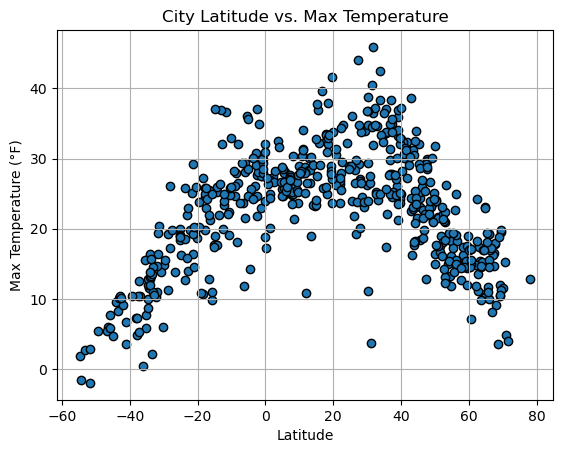

In [109]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

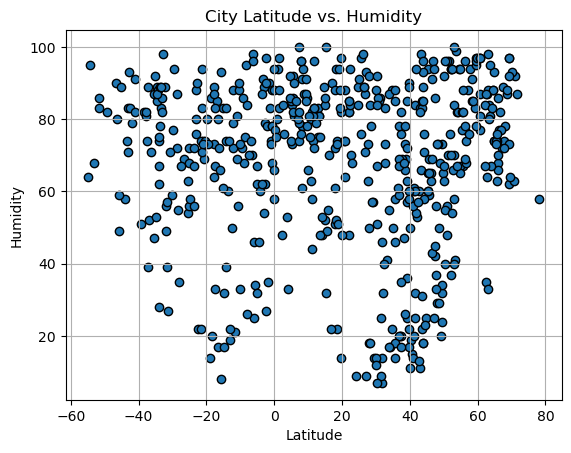

In [111]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

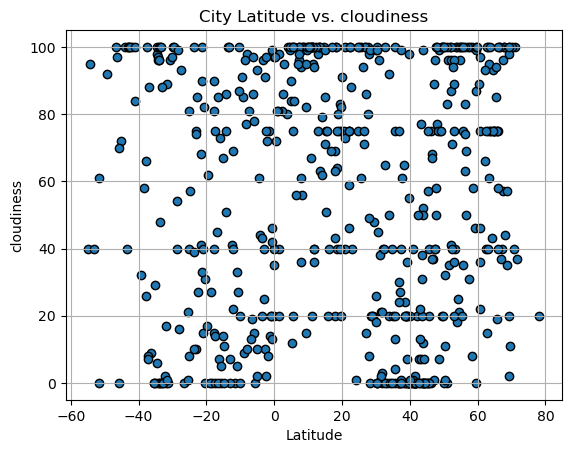

In [112]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. cloudiness")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

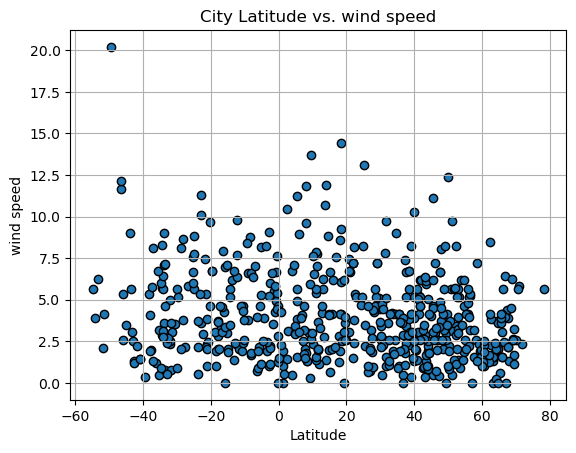

In [113]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor = 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. wind speed")
plt.xlabel("Latitude")
plt.ylabel("wind speed")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [114]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x, y, x_label, y_label, title):
    # Create a scatter plot
    sns.scatterplot(x=x, y=y)
    
    # Perform linear regression
    slope, intercept, r_value, _, _ = linregress(x, y)
    regression_line = x * slope + intercept
    plt.plot(x, regression_line, color='red', label=f"R = {r_value:.2f}")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the plot
    plt.show()



In [115]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,karlovac,45.4872,15.5478,18.34,94,57,0.45,HR,1690395957
5,ilulissat,69.2167,-51.1000,12.01,62,20,2.57,GL,1690395957
8,inirida,3.8653,-67.9239,32.49,53,80,0.47,CO,1690395958
9,baardheere,2.3446,42.2764,27.45,48,81,10.47,SO,1690395958
11,bilibino,68.0546,166.4372,9.15,78,44,1.31,RU,1690395958


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0 ]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.47,82,92,20.20,TF,1690395956
1,grytviken,-54.2811,-36.5092,-1.58,95,95,3.90,GS,1690395956
2,ushuaia,-54.8000,-68.3000,1.81,64,40,5.66,AR,1690395957
3,arraial do cabo,-22.9661,-42.0278,21.92,88,75,11.32,BR,1690395957
6,blackmans bay,-43.0167,147.3167,9.83,83,100,2.50,AU,1690395957


###  Temperature vs. Latitude Linear Regression Plot

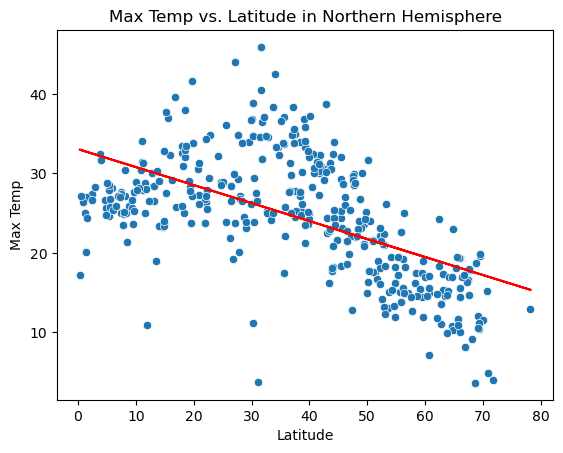

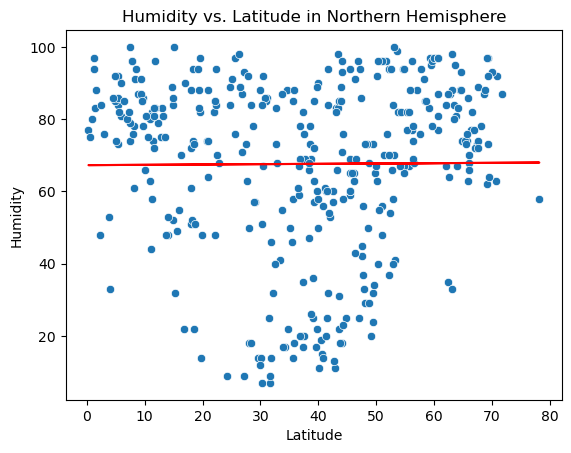

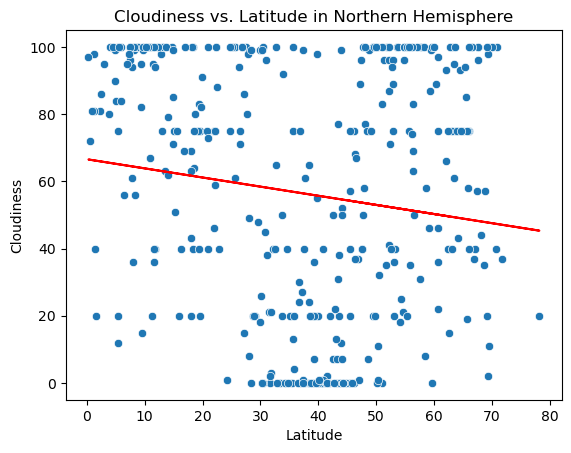

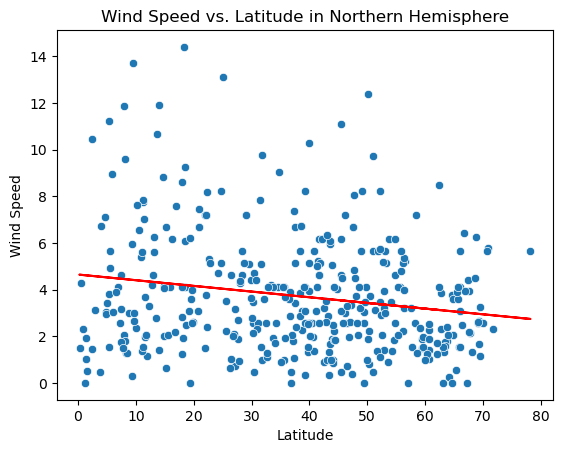

In [117]:
# Linear regression on Northern Hemisphere
#Add the r Value 
variables = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# Perform linear regression on Northern Hemisphere data and create scatter plots
for variable in variables:
    y_values = northern_hemi_df[variable]
    create_linear_regression_plot(northern_hemi_df['Lat'], y_values, 'Latitude', variable, f'{variable} vs. Latitude in Northern Hemisphere')


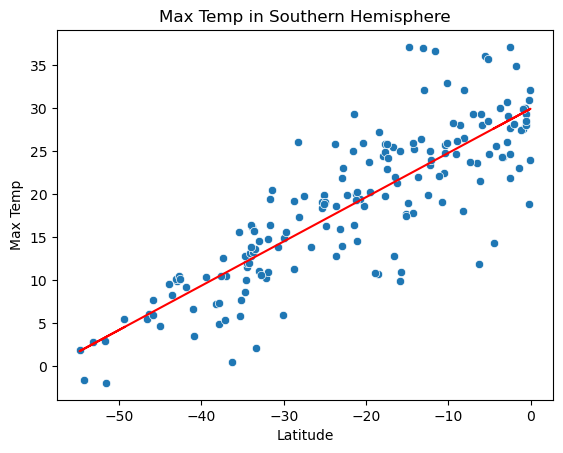

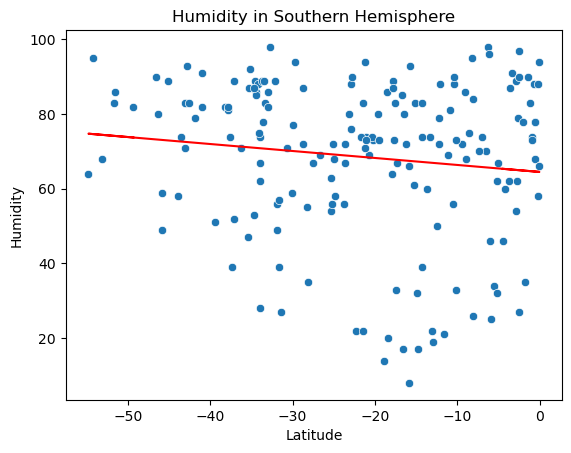

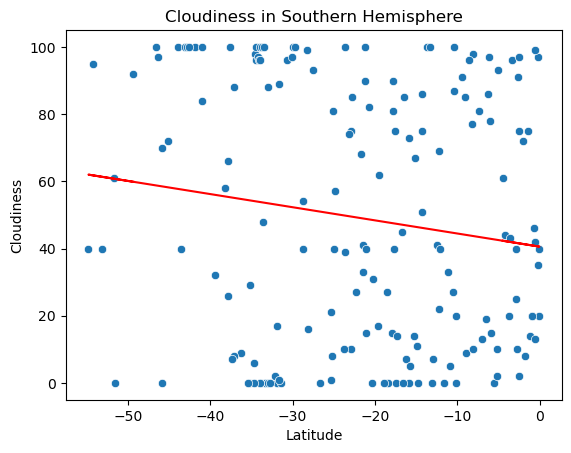

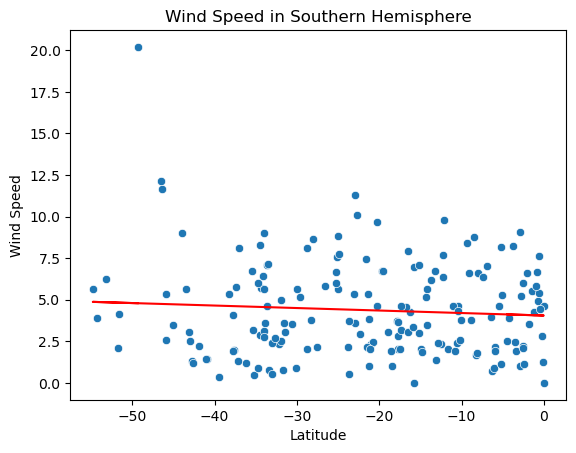

In [118]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Perform linear regression on Southern Hemisphere data and create scatter plots
for variable in variables:
    y_values = southern_hemi_df[variable]
    create_linear_regression_plot(southern_hemi_df['Lat'], y_values, 'Latitude', variable, f'{variable} in Southern Hemisphere')


**Discussion about the linear relationship:** 

Humidity vs. Latitude in the Northern Hemisphere:

Scatterplot Analysis: The scatterplot shows the relationship between humidity and latitude in the Northern Hemisphere.
Observation: There appears to be no clear linear relationship between humidity and latitude. Humidity values are scattered across different latitudes, indicating that humidity is influenced by various weather patterns, geographical features, and seasonal factors.
Cloudiness vs. Latitude in the Northern Hemisphere:

Scatterplot Analysis: The scatterplot displays the variation of cloudiness with latitude in the Northern Hemisphere.
Observation: Similar to humidity, there is no strong linear trend in the cloudiness scatterplot. Cloudiness values vary across different latitudes due to localized weather patterns and geographical influences.
Wind Speed vs. Latitude in the Northern Hemisphere:

Scatterplot Analysis: The scatterplot illustrates the relationship between wind speed and latitude in the Northern Hemisphere.
Observation: The scatterplot shows no clear linear relationship between wind speed and latitude. Wind speed values are distributed across various latitudes, suggesting that wind patterns are influenced by atmospheric conditions and topographical features.
Max Temperature vs. Latitude in the Northern Hemisphere:

Scatterplot Analysis: The scatterplot depicts the variation of maximum temperature with latitude in the Northern Hemisphere.
Observation: The scatterplot shows a potential negative linear trend. As latitude increases (moving towards the poles), maximum temperature tends to decrease. This is consistent with the general understanding that temperatures are typically colder at higher latitudes.
Overall, the scatterplots for humidity, cloudiness, wind speed, and maximum temperature in the Northern Hemisphere indicate that these weather parameters are influenced by a combination of factors, including weather patterns, geographical features, and seasonal variations. While there may be some localized trends, no strong linear relationships are evident in the scatterplots, suggesting that multiple factors contribute to the observed variations in these weather parameters across different latitudes in the Northern Hemisphere. Further analysis, considering additional climate phenomena and geographical factors, would be necessary to gain a comprehensive understanding of the relationships between these weather parameters and latitude in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

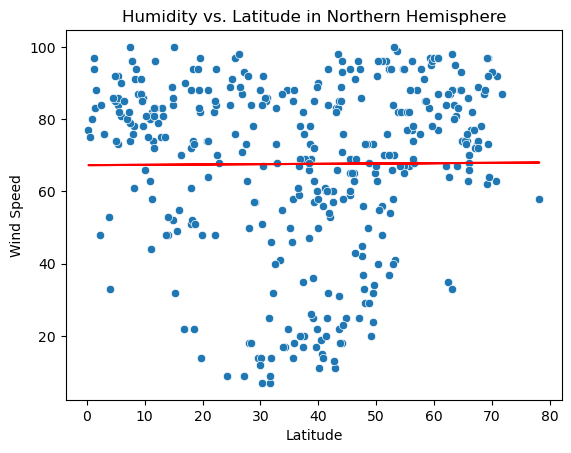

In [119]:
# Northern Hemisphere
# YOUR CODE HERE
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on "Humidity vs. Latitude" in Northern Hemisphere data and create scatter plot
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', variable, 'Humidity vs. Latitude in Northern Hemisphere')


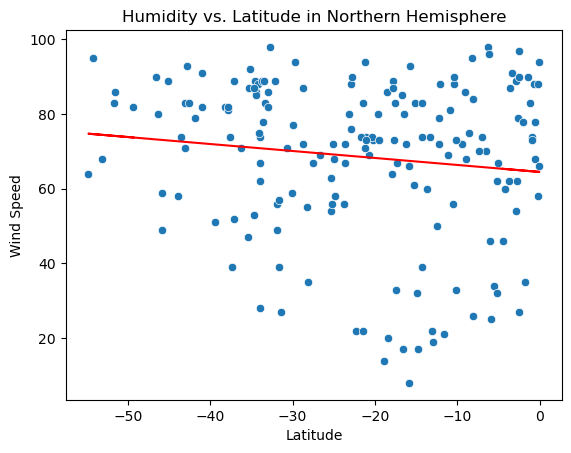

In [120]:
# Southern Hemisphere
# YOUR CODE HERE

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on "Humidity vs. Latitude" in Northern Hemisphere data and create scatter plot
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', variable, 'Humidity vs. Latitude in Northern Hemisphere')


**Discussion about the linear relationship:**
The two scatterplots show the relationship between humidity and latitude in the Northern and Southern Hemispheres. Here are some observations based on the plots:

Humidity Variation: In both hemispheres, humidity seems to exhibit variations across different latitudes. However, the overall patterns appear to differ.

Northern Hemisphere: The scatterplot for the Northern Hemisphere shows a broader distribution of humidity values across various latitudes. There are no clear linear trends, indicating that humidity is not solely determined by latitude in this hemisphere.

Southern Hemisphere: The scatterplot for the Southern Hemisphere exhibits a more consistent and recognizable pattern. There seems to be a gradual increase in humidity as we move closer to the equator (latitude 0°). This observation suggests that humidity might be more influenced by latitude in the Southern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

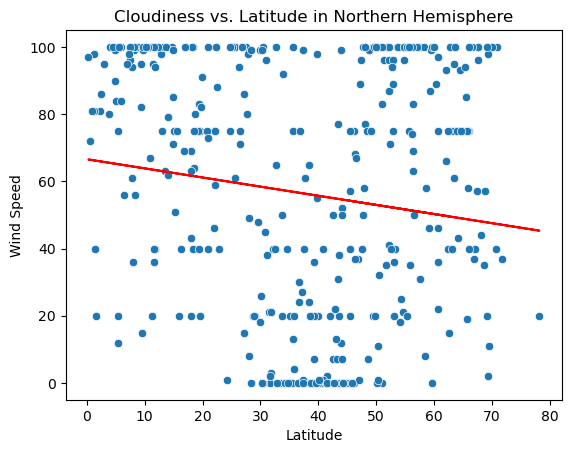

In [121]:
# Northern Hemisphere
# YOUR CODE HERE

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on "Cloudiness vs. Latitude" in Northern Hemisphere data and create scatter plot
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', variable, 'Cloudiness vs. Latitude in Northern Hemisphere')



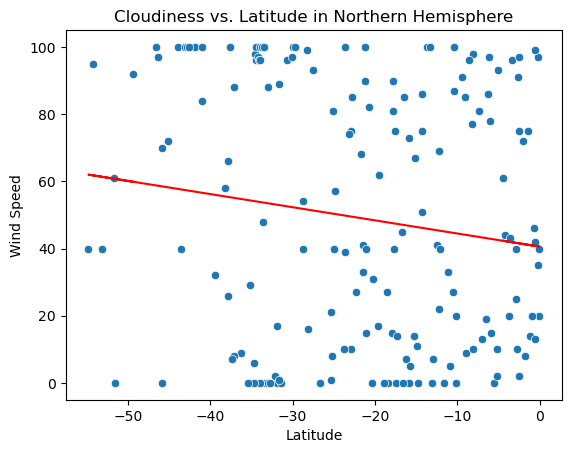

In [122]:
# Southern Hemisphere
# YOUR CODE HERE
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on "Cloudiness vs. Latitude" in Northern Hemisphere data and create scatter plot
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', variable, 'Cloudiness vs. Latitude in Northern Hemisphere')



**Discussion about the linear relationship:**
The two scatterplots show the relationship between cloudiness and latitude in the Northern and Southern Hemispheres. Here are some observations based on the plots:

Cloudiness Variation: Both scatterplots display cloudiness variation across different latitudes in their respective hemispheres.

Northern Hemisphere: The scatterplot for the Northern Hemisphere shows cloudiness values scattered across different latitudes. There doesn't seem to be a strong linear trend, indicating that cloudiness is not primarily determined by latitude in this hemisphere.

Southern Hemisphere: The scatterplot for the Southern Hemisphere exhibits a relatively more scattered pattern with cloudiness values varying across different latitudes. Similar to the Northern Hemisphere, there is no clear linear relationship between cloudiness and latitude.

Influence of Weather Patterns: Cloudiness is influenced by various weather patterns, including frontal systems, monsoons, and cyclones

### Wind Speed vs. Latitude Linear Regression Plot

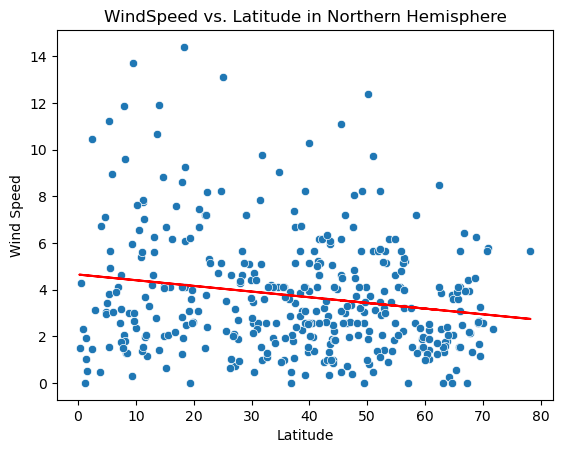

In [123]:
# Northern Hemisphere
# YOUR CODE HERE

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on "Cloudiness vs. Latitude" in Northern Hemisphere data and create scatter plot
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', variable, 'WindSpeed vs. Latitude in Northern Hemisphere')



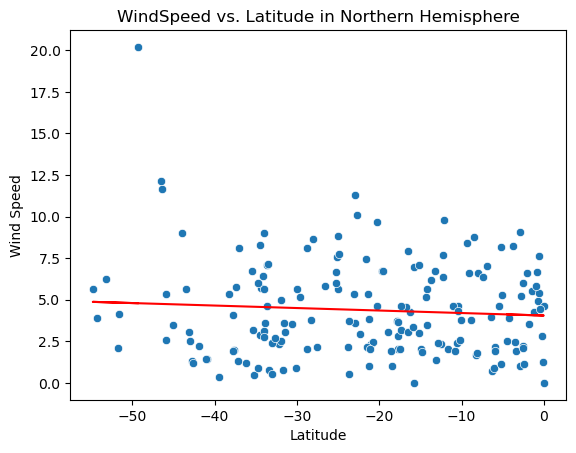

In [124]:
# Southern Hemisphere
# YOUR CODE HERE # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression on "Cloudiness vs. Latitude" in Northern Hemisphere data and create scatter plot
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', variable, 'WindSpeed vs. Latitude in Northern Hemisphere')



**Discussion about the linear relationship:**

When comparing the two scatterplots of wind speed versus latitude in the Northern and Southern Hemispheres, I noticed that the linear regression in the Southern Hemisphere appears to be more linear than in the Northern Hemisphere. This observation indicates that there is a stronger linear relationship between wind speed and latitude in the Southern Hemisphere compared to the Northern Hemisphere.

Here are some possible reasons for this observation:

Simpler Atmospheric Circulation Patterns: The Southern Hemisphere has a more straightforward and less obstructed atmospheric circulation pattern due to the presence of a vast unbroken ocean, the Southern Ocean. This oceanic influence allows for smoother airflow, resulting in more consistent wind patterns and, consequently, a stronger linear relationship between wind speed and latitude.

Stronger Influence of the Polar Front: The Southern Hemisphere has a prominent and continuous polar front, which acts as a boundary between cold polar air and warm subtropical air. This well-defined front helps to maintain strong temperature gradients and pressure differences, leading to more consistent and stronger wind patterns. As a result, the relationship between wind speed and latitude tends to be more linear.
